# Day 08. Exercise 04
# Regression

## 0. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [3]:
df = pd.read_csv('../../datasets/checker_regression.csv')
df.fillna(0,inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [4]:
X= df[['num_commits','pageviews']]
y=df['AVG(diff)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [6]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_scores = []
    test_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
        test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
        
        train_scores.append(train_rmse)
        test_scores.append(test_rmse)
        print(f'train - {train_rmse} | test - {test_rmse}')
    print(f'Average RMSE on crossval is {np.mean(test_scores)}')

In [7]:
lin = LinearRegression()
crossval(10,X,y,lin)

train - 42.27291015233797 | test - 70.43979397280242
train - 47.45726648237968 | test - 30.657394014354043
train - 47.77854388604299 | test - 27.137319378269105
train - 46.2441901620785 | test - 44.123072052096376


train - 46.39355004742244 | test - 42.420391728163665
train - 47.71541914802497 | test - 28.273391654514054
train - 46.308918660456506 | test - 45.67313727400561
train - 47.81194647242181 | test - 20.57247658092342
train - 44.12915324532897 | test - 63.14957718941947
train - 42.350893141368886 | test - 74.15893330081012
Average RMSE on crossval is 44.66054871453583


In [8]:
dt = DecisionTreeRegressor()
crossval(10,X,y,dt)

train - 0.0 | test - 71.88489835223467
train - 0.0 | test - 25.24371208835975
train - 0.0 | test - 0.0
train - 0.0 | test - 20.293964620053917
train - 0.0 | test - 72.20506003352149
train - 0.0 | test - 28.991378028648448
train - 0.0 | test - 7.0364255643204405
train - 0.0 | test - 8.126236169698386
train - 0.0 | test - 86.63649383194165
train - 0.0 | test - 65.93049851867218
Average RMSE on crossval is 38.634866720745094


In [9]:
rf = RandomForestRegressor()
crossval(10,X,y,rf)

train - 13.803531997262017 | test - 54.29296574871984
train - 14.781129205285135 | test - 11.246886908162583
train - 15.42879693120511 | test - 0.0
train - 15.795064974004095 | test - 24.823926362595337
train - 14.816945041604967 | test - 49.96396467191245
train - 13.682994294036813 | test - 32.11796851279497
train - 15.560499774178917 | test - 14.716077347581455
train - 14.50599216528144 | test - 21.342519897412018
train - 12.766124671464746 | test - 72.92156927986467
train - 13.569693758300051 | test - 50.697671271148764
Average RMSE on crossval is 33.21235500001921


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

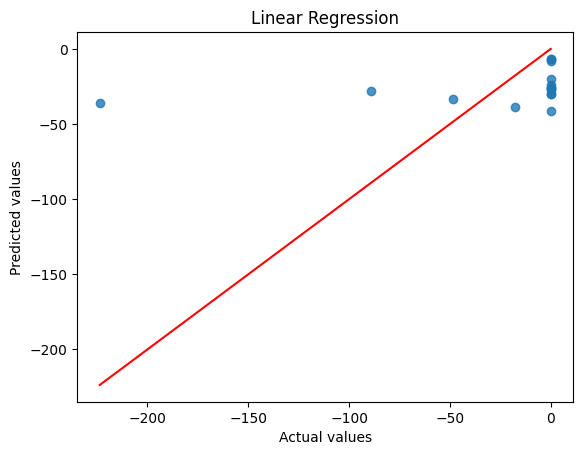

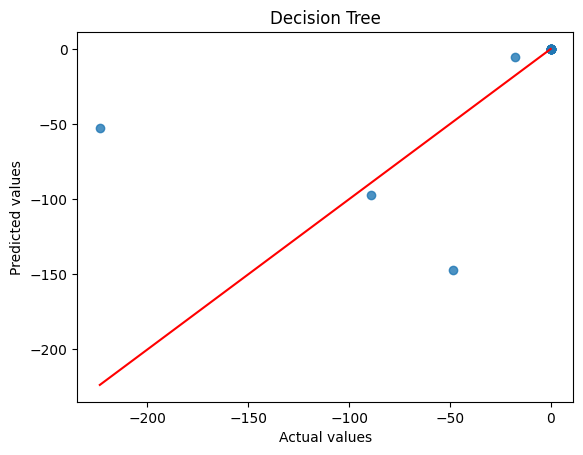

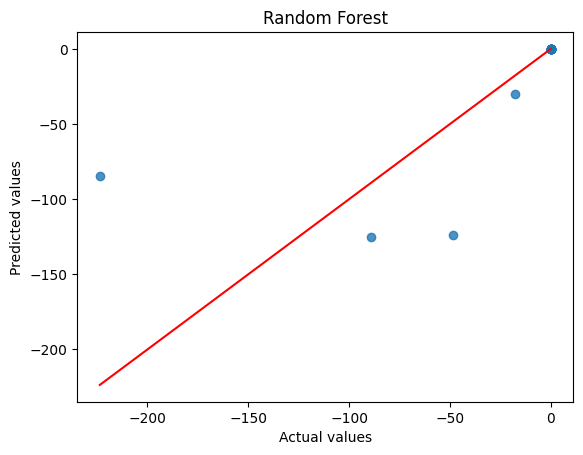

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=21),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.8)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'red')
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(name)
    plt.show()

diagonal like red line